Pandas for managing datasets

In [57]:
import pandas as pd

Matplotlib for additional customization

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline

Seaborn for plotting and styling

In [59]:
import seaborn as sns
sns.set()

Read dataset

In [60]:
df = pd.read_csv('UTSEUS-anjuke-real-estate.csv', index_col=0)

Display first 5 observations

In [61]:
df.head()

,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
id,,,,,,,,,,,,
A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


1. Scatter plot

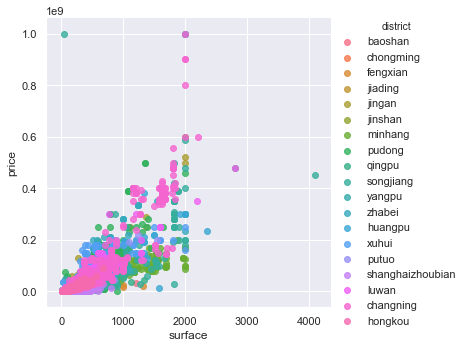

In [6]:
sns.lmplot(x='surface', y='price', data=df,
          fit_reg=False, # No regression line
          hue='district') # Color by district

Customizing with Matplotlib

(0, 4351.119267991637)

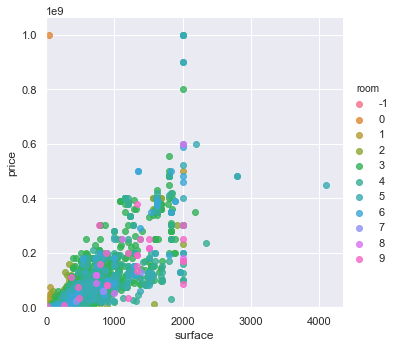

In [7]:
sns.lmplot(x='surface', y='price', data=df,
          fit_reg=False, # No regression line
          hue='room') # Color by district
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

Default boxplot, log scale for better visu

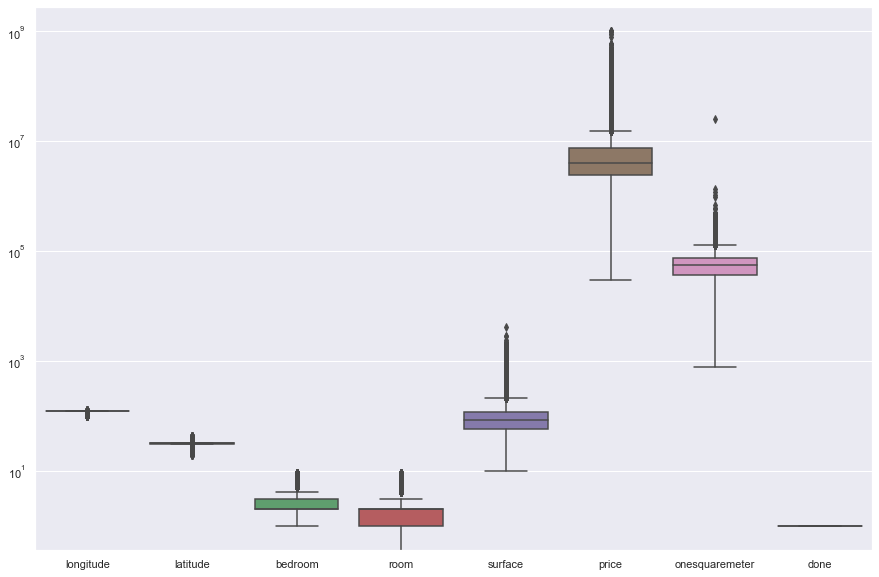

In [8]:
plt.figure(figsize=(15,10))
plt.yscale("log")
sns.boxplot(data=df)

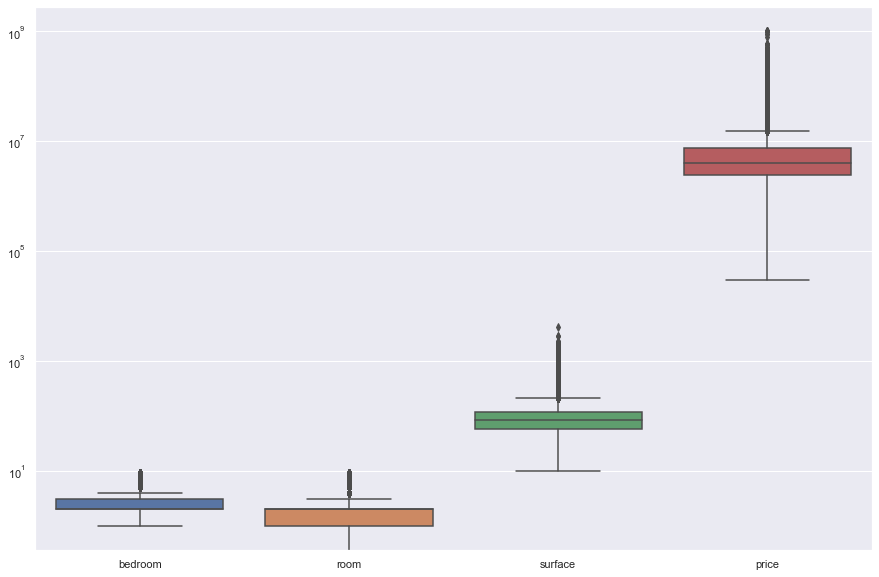

In [62]:
surface_df = df.drop(['longitude', 'latitude', 'done', 'onesquaremeter'], axis=1)
plt.figure(figsize=(15,10))
plt.yscale("log")
sns.boxplot(data=surface_df)

Set theme, then plot violin plot

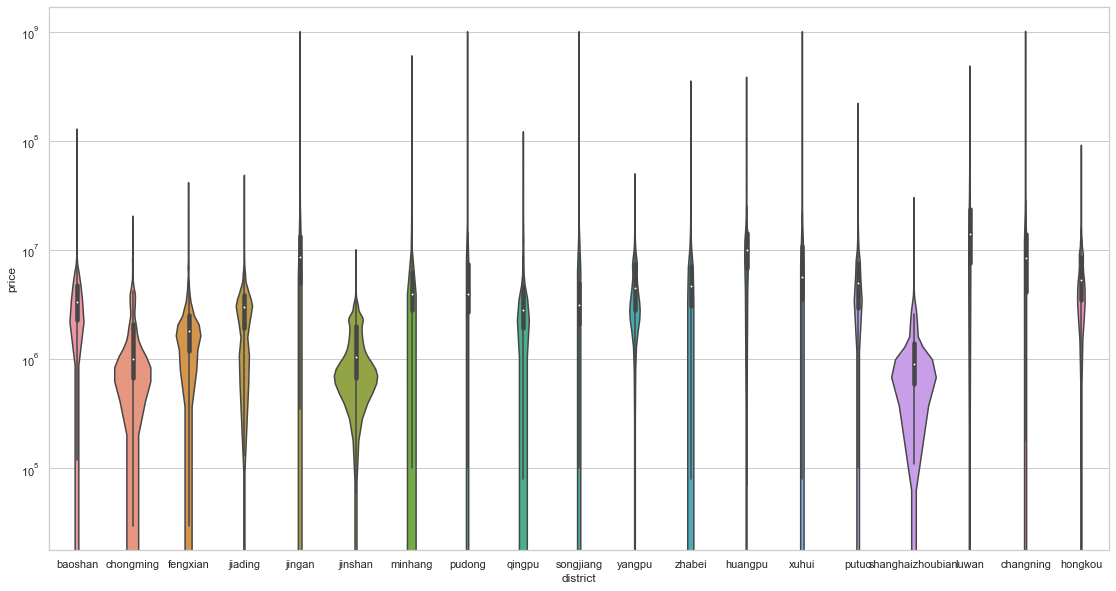

In [10]:
# Set theme
sns.set_style('whitegrid')
plt.figure(figsize=(19,10))
plt.yscale("log")
 
# Violin plot
sns.violinplot(x='district', y='price', data=df)

District color palette

In [63]:
district_type_colors = ['#e6194B',
                        '#3cb44b', 
                        '#ffe119', 
                        '#4363d8', 
                        '#f58231', 
                        '#911eb4', 
                        '#42d4f4', 
                        '#f032e6', 
                        '#bfef45', 
                        '#fabebe', 
                        '#469990', 
                        '#e6beff', 
                        '#9A6324', 
                        '#fffac8', 
                        '#800000', 
                        '#aaffc3', 
                        '#808000', 
                        '#ffd8b1', 
                        '#000075'
                    ]

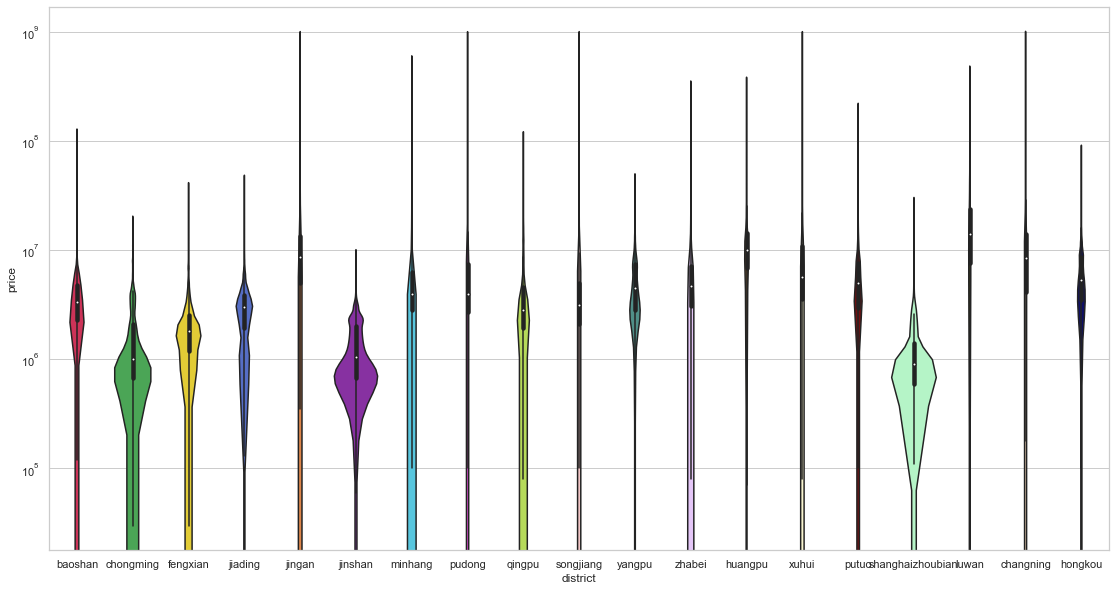

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(19,10))
plt.yscale("log")
sns.violinplot(x='district', y='price', data=df, 
               palette=district_type_colors) # Set color palette

Swarm plot

In [39]:
short_df = df[:3000]

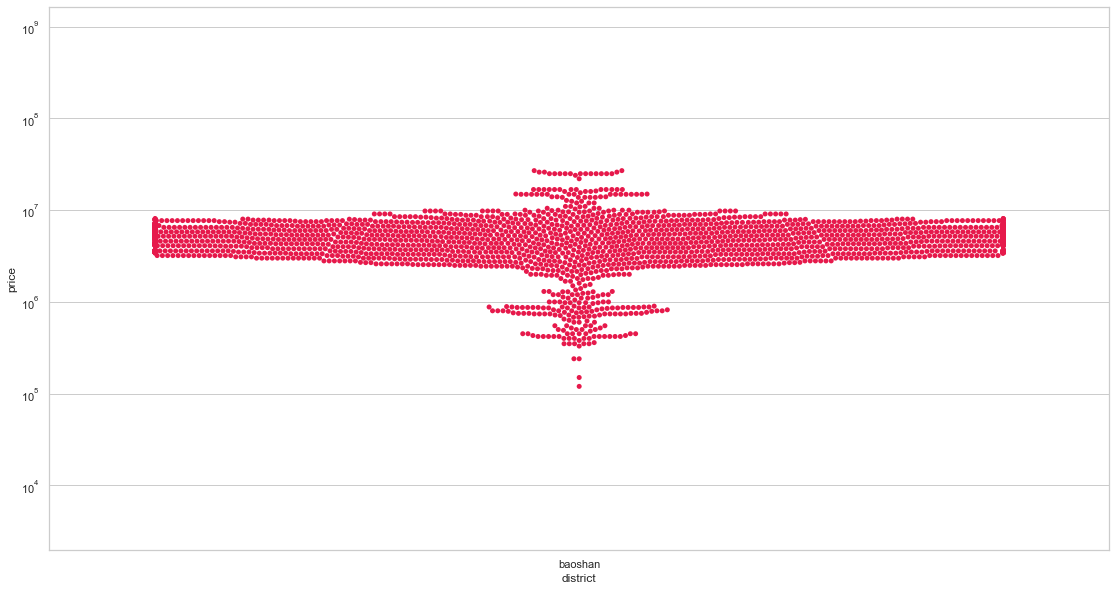

In [13]:
plt.figure(figsize=(19,10))
plt.yscale("log")
sns.swarmplot(x='district', y='price', data=short_df, 
              palette=district_type_colors)

Overlaying swarm and violin plots

Text(0.5, 1.0, 'Price by District')

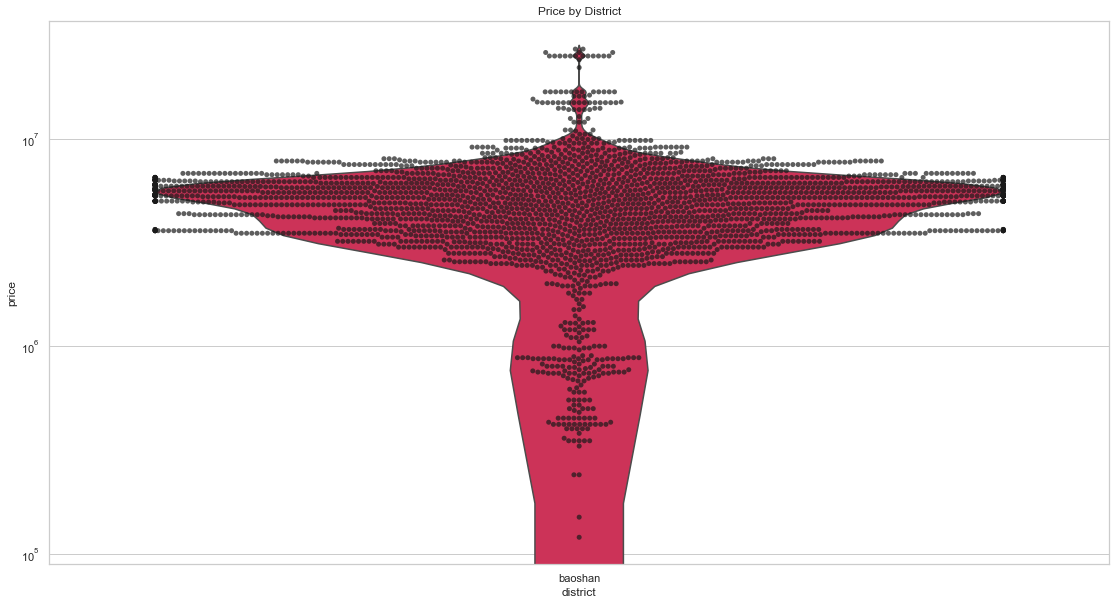

In [16]:
plt.figure(figsize=(19,10))
plt.yscale("log")

# Create plot
sns.violinplot(x='district', y='price', data=short_df,
               inner=None,
               palette=district_type_colors)

sns.swarmplot(x='district', 
              y='price', 
              data=short_df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

# Set title with matplotlib
plt.title('Price by District')

Get a shorter randomized dataset

In [15]:
import numpy as np

In [41]:
df['subset'] = np.random.uniform(0, 1, len(df)) < 0.02
df = df[df['subset']==True]
len(df)

9433

Density plot

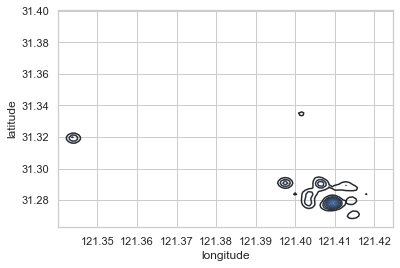

In [43]:
sns.kdeplot(short_df.longitude, short_df.latitude)

Melt DataFrame

In [45]:
surface_df.head()

,address,bedroom,room,surface,price,tags,district,neighborhood
id,,,,,,,,
A888553302,宝山-大场 金地艺境(宝山)(555弄),2,2,30.0,1160000.0,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang
A888376847,宝山-大场 骏华苑,1,1,38.0,1950000.0,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang
A885088482,宝山-大场 琉樽尚品(255弄),3,2,92.0,5350000.0,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang
A885392981,宝山-大场 琉樽尚品（255弄）,2,2,68.0,4350000.0,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang
A885831305,宝山-大场 美好家小区,2,2,80.0,4000000.0,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang


In [65]:
melted_df = pd.melt(surface_df,
                   id_vars=['address', 'price', 'tags', 'district', 'neighborhood', 'surface'],
                   var_name='RoomsNumber')

In [66]:
melted_df.head()

,address,price,tags,district,neighborhood,surface,RoomsNumber,value
0,宝山-大场 金地艺境(宝山)(555弄),1160000.0,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,30.0,bedroom,2
1,宝山-大场 骏华苑,1950000.0,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,38.0,bedroom,1
2,宝山-大场 琉樽尚品(255弄),5350000.0,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,92.0,bedroom,3
3,宝山-大场 琉樽尚品（255弄）,4350000.0,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,68.0,bedroom,2
4,宝山-大场 美好家小区,4000000.0,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,80.0,bedroom,2


In [67]:
print(surface_df.shape)

(467029, 8)


In [68]:
print(melted_df.shape)

(934058, 8)


In [69]:
short_melt_df = melted_df[:3000]

Swarmplot with melted_df

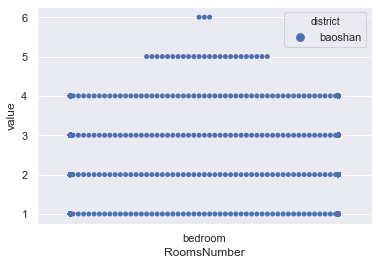

In [72]:
sns.swarmplot(x='RoomsNumber', y='value', data=short_melt_df, 
              hue='district')